# Fitting Spectral Models

In this first section, the main goal will be to get some practice with fitting spectral models to data. 

## Power Spectra Data

In this first section we will load some example power spectra data

Note: to answer the specific questions asked here, you shouldn't need to import any additional functions. However, you are welcome and encouraged to import and use additional functions and tools if you wish to further explore this data. 

In [1]:
# Import spectral parameterization code
from fooof import FOOOF
from fooof.analysis import get_band_peak_fm

# Import helper function to load example power spectra data
from fooof.utils.download import load_fooof_data

#### Example 1

First, we will load an example piece of data. Initialize a fooof object and fit a spectral model to this data. 

In [2]:
# Load an example power spectrum
freqs = load_fooof_data('freqs.npy')
powers = load_fooof_data('spectrum.npy')

In [3]:
# Initialize a spectral model object
fm1 = FOOOF()


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.49 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 1 - 50 Hz                        
                                 Frequency Resolution is 0.49 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offs

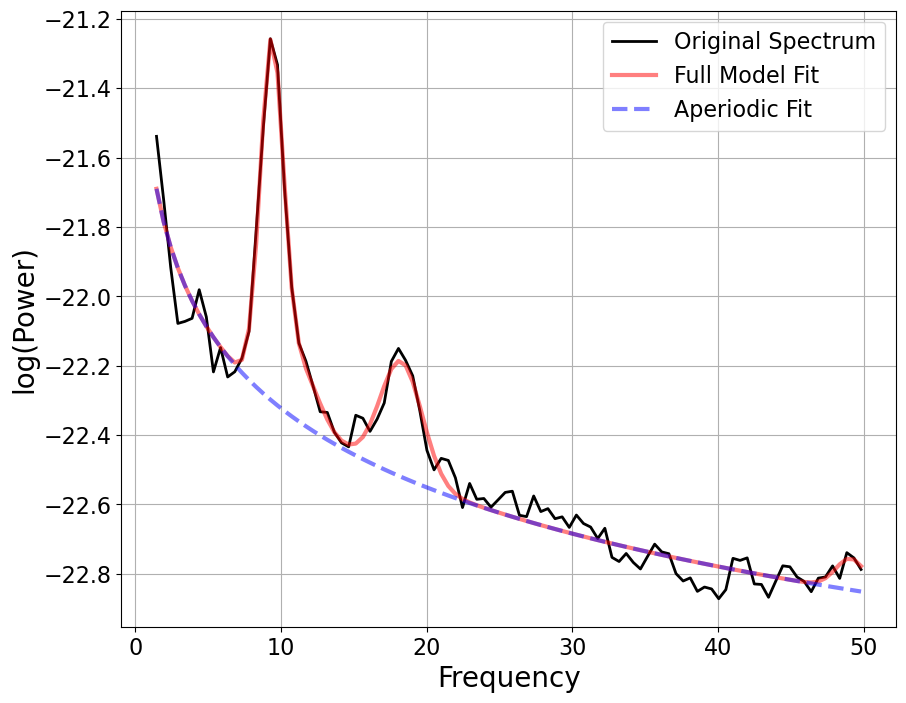

In [4]:
# Fit a spectral model to the data
fm1.report(freqs, powers)

#### Example 2

Next we will load and fit a spectral model to a different example piece of data. 

Hint: this example data has a different frequency range - so you should explore limiting the fit range of the spectral model. 

In [5]:
# Load a second example power spectrum
freqs = load_fooof_data('freqs_2.npy')
powers = load_fooof_data('spectrum_2.npy')

In [6]:
# Initialize a spectral model object
fm2 = FOOOF()


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.49 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 3 - 40 Hz                        
                                 Frequency Resolution is 0.49 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offs

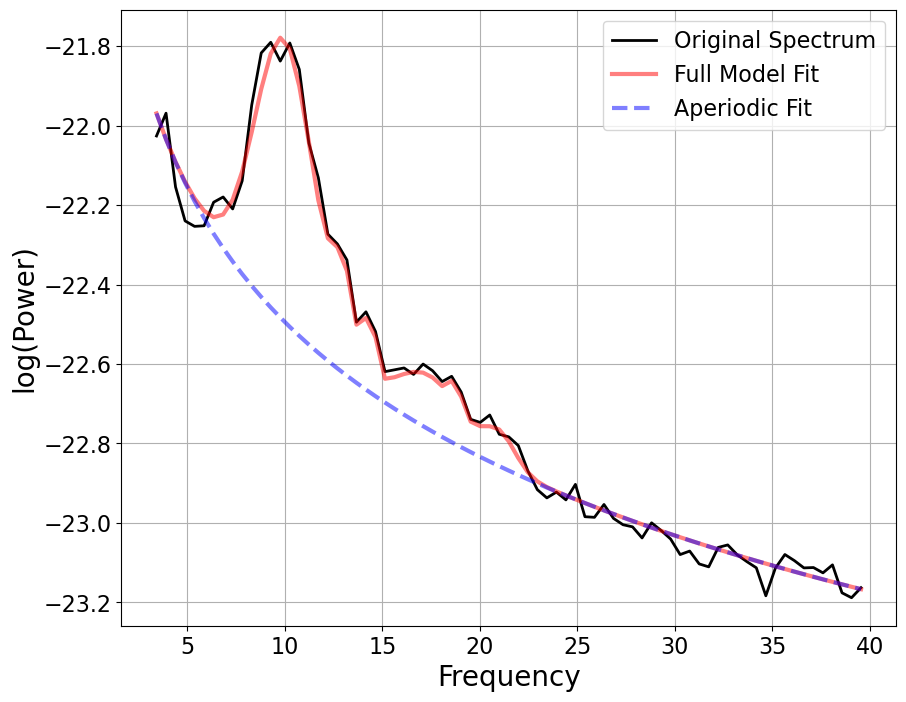

In [7]:
# Fit a spectral model to the data
fm2.report(freqs, powers, freq_range=[3, 40])

#### Compare Model 1 & Model 2

Now let's compare the models we fit to these different pieces of example data, by comparing the fit parameters from the spectral models. 

- Which power spectrum has the steepest exponent?
- Which power spectrum has the biggest peak?

In [8]:
# Compare aperiodic exponent
print('Model1 - exp: ', fm1.get_params('aperiodic', 'exponent'))
print('Model2 - exp: ', fm2.get_params('aperiodic', 'exponent'))

Model1 - exp:  0.7580341648029859
Model2 - exp:  1.1259834643301734


In [9]:
# Compare periodic peaks
print('Model1 - peak: ', get_band_peak_fm(fm1, [1, 20]))
print('Model2 - peak: ', get_band_peak_fm(fm2, [1, 20]))

Model1 - peak:  [9.36692475 1.03783353 1.57850562]
Model2 - peak:  [9.98344565 0.703915   3.05038634]


#### Example 3

This example data comes from a different source - it is intra-cranial data. For intracranial data, we can think about fitting a broader frequency range - try fitting the range of 1-75 Hz. Explore setting up the model fitting to properly describe this data. 

Hint: make sure you explore visualizing this data in both semi-log and log-log representations, and use this to inform the settings you need to best parameterize the data (check the tutorials for information on different model forms).

In [10]:
# Load a third example power spectra
freqs = load_fooof_data('freqs_lfp.npy')
powers = load_fooof_data('spectrum_lfp.npy')

In [11]:
# Define a spectral model object, with specified settings
fm3 = FOOOF(aperiodic_mode='knee')


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 1.00 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 1 - 75 Hz                        
                                 Frequency Resolution is 1.00 Hz                                  
                                                                                                  
                         Aperiodic Parameters (offset,

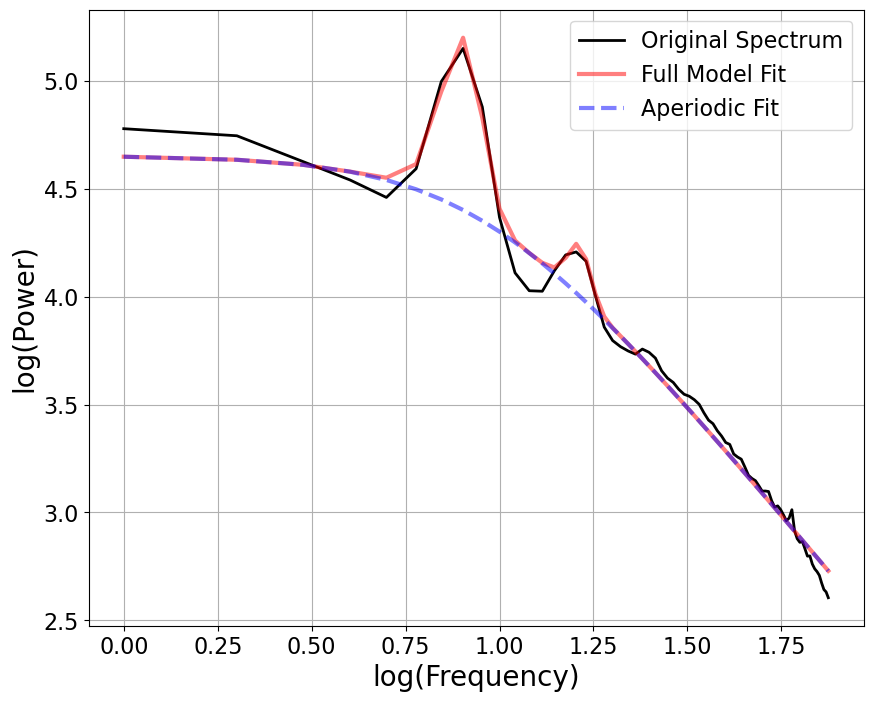

In [12]:
# Fit the spectral model to the data
fm3.report(freqs, powers, freq_range=[1, 75], plt_log=True)

## Time Series Data

Next up, we will work with some time series data.

Note: to answer the specific questions asked here, you shouldn't need to import any additional functions. However, you are welcome and encouraged to import and use additional functions and tools if you wish to further explore this data. 

In [13]:
# Import 
from neurodsp.spectral import compute_spectrum
from neurodsp.plts import plot_time_series

# Import helper function to load example time series data
from neurodsp.utils.download import load_ndsp_data

In [14]:
# Define the sampling rate for the example data that we will use
fs = 1000

#### Time Series Example

Here, we will load an example time series of data. 

Visualize this data, explore it, and then compute a power spectra for the data and fit a spectral model. 

What do you learn about this data from exploring it?

In [15]:
# Load an example time series
time_series = load_ndsp_data('sample_data_2.npy')

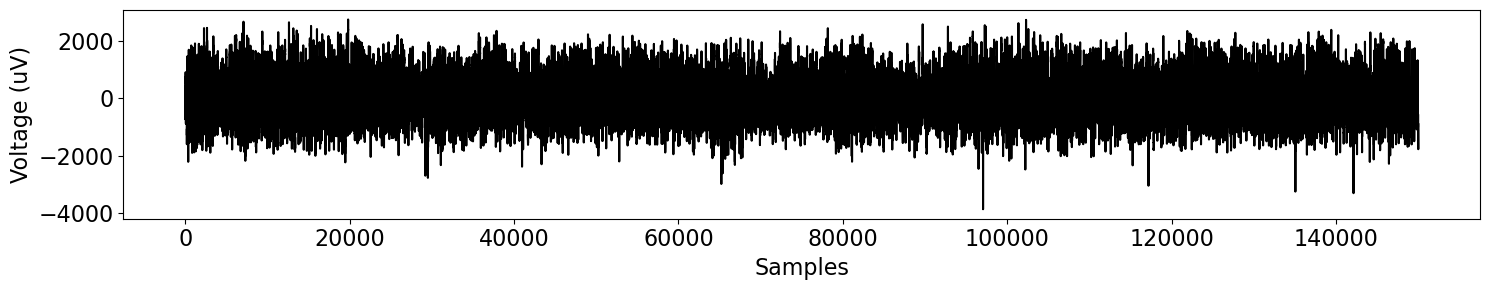

In [16]:
# Plot the time series
plot_time_series(None, time_series)

In [17]:
# Compute a power spectrum of the time series
freqs, powers = compute_spectrum(time_series, fs)

In [18]:
# Initialize a new spectral model to fit the power spectrum
fm4 = FOOOF(aperiodic_mode='knee')


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 1.00 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 2 - 75 Hz                        
                                 Frequency Resolution is 1.00 Hz                                  
                                                                                                  
                         Aperiodic Parameters (offset,

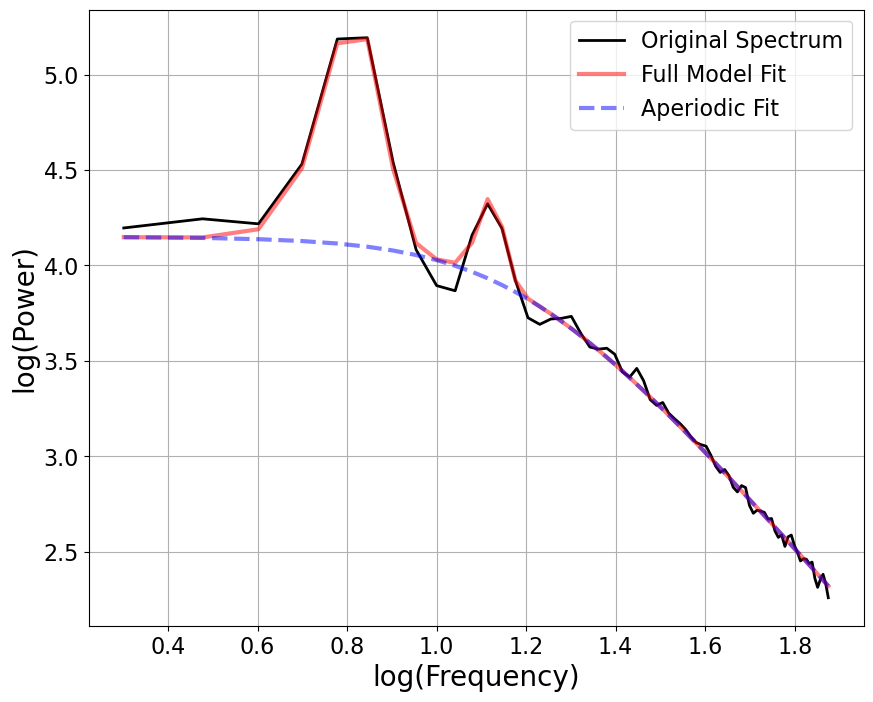

In [19]:
# Fit the spectral model to the power spectrum
fm4.report(freqs, powers, [2, 75], plt_log=True)

## Conclusion

In this section, we explored the basics of fitting power spectral models to power spectra, including starting from time series. 

If you haven't already, make sure you explore the different settings and frequency ranges to examine and fit the data above. For all the examples, there should be a way to fit the data in a way that looks to represent a good model fit - but there are also ways to define the settings such that the model does not fit well. Explore and compare cases when the model does fit well, and when it does not.